# Walmart Store Sales Forecasting

## 1. EDA
- train
- test

## 2. Key concept
- model: PCA + STL + ETS
- PCA
- Shift

## 3. Limitation

# 1. EDA
# Train data set

In [1]:
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("train.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Test data set

In [2]:
test = pd.read_csv("test.csv")
test['Date'] = pd.to_datetime(test['Date'])
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Store/Dept list

In [109]:
print('Store list: {}'.format(df['Store'].nunique()), df['Store'].unique(), sep='\n')
print()
print('Dept list: {}'.format(df['Dept'].nunique()), df['Dept'].unique(), sep='\n')

Store list: 45
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

Dept list: 81
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [370]:
df_data1 = pd.DataFrame(columns=df['Store'].unique(), index=df['Dept'].unique())

for store in df['Store'].unique():
    c = df['Store'] == store
    for dept in df.loc[c, 'Dept'].unique():
        df_data1.loc[dept, store] = 1

df_data1 = df_data1.fillna(-1)

need to make : 3331  models


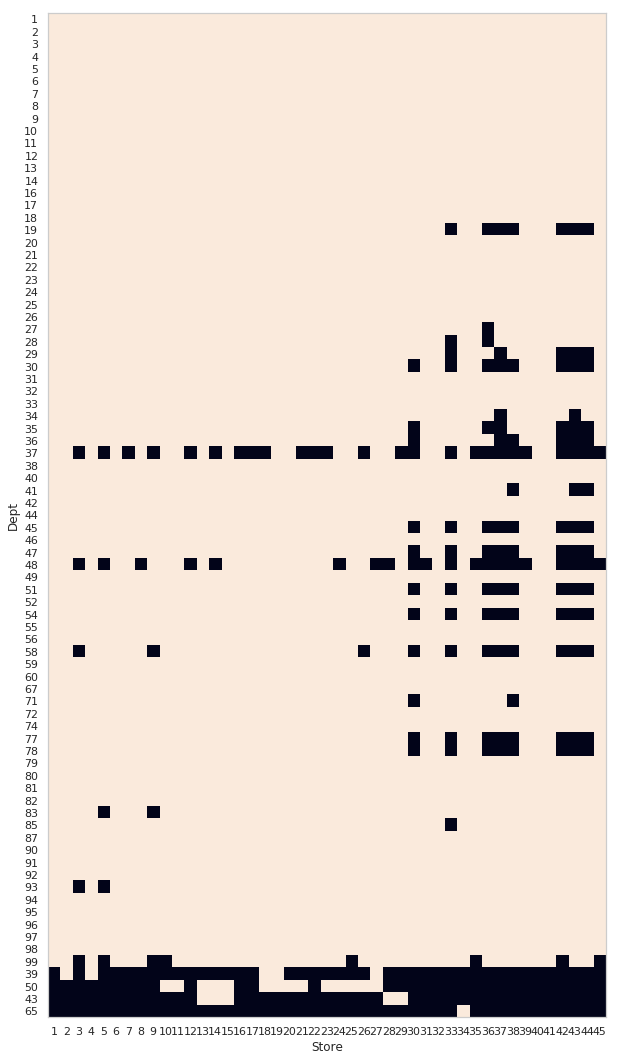

In [375]:
# show Store and Dept
print('need to make :', len(np.where(df_data1==1)[0]), ' models')

fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(df_data1)

ax.set_xlabel('Store')
ax.set_ylabel('Dept')
ax.set_xticks(np.arange(df['Store'].nunique()))
ax.set_yticks(np.arange(df['Dept'].nunique()))
ax.set_xticklabels(df['Store'].unique())
ax.set_yticklabels(df['Dept'].unique())
plt.grid(False)
plt.show()

In [377]:
df_data2 = pd.DataFrame(columns=df['Store'].unique(), index=df['Dept'].unique())

for store in test['Store'].unique():
    c = test['Store'] == store
    for dept in test.loc[c, 'Dept'].unique():
        df_data2.loc[dept, store] = 2
df_data2 = df_data2.fillna(-2)

In [392]:
print('the problems is 1: orange')
pd.DataFrame({'train_o': ['3: ivory', '-1: red'], 'train_x': ['1: orange', '-3: black']}, index=['test_o', 'test_x'])

the problems is 1: orange


,train_o,train_x
test_o,3: ivory,1: orange
test_x,-1: red,-3: black


need to make : 3169  models
lack of data : 11


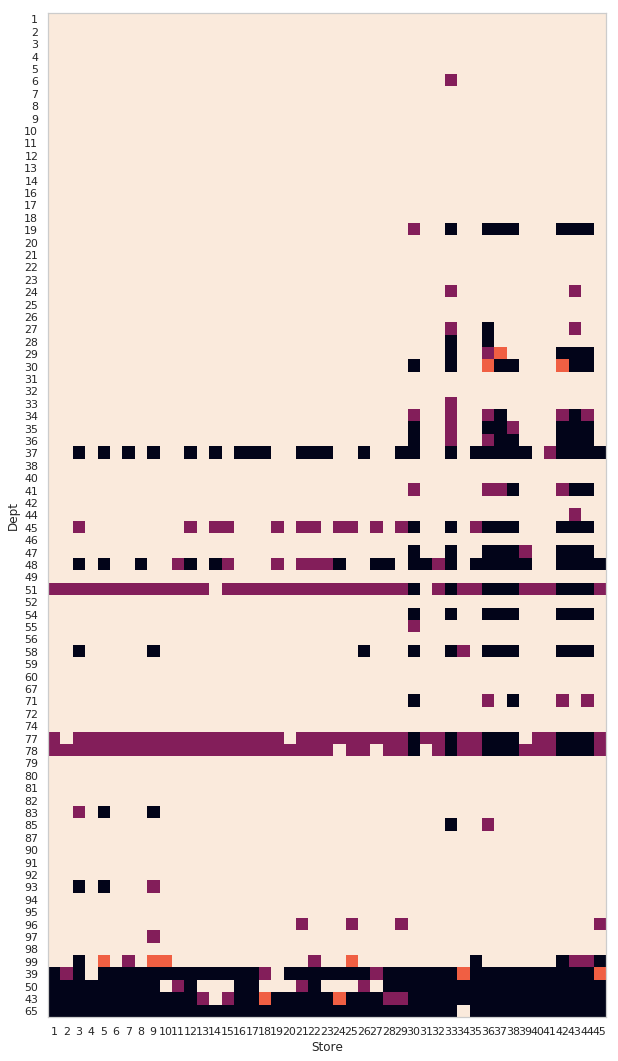

In [394]:
# show Store and Dept
print('need to make :', len(np.where(df_data2==2)[0]), ' models')
print('lack of data :', len(np.where(df_data2+df_data1==1)[0]))

fig, ax = plt.subplots(figsize=(10, 20))
plt.imshow(df_data1 + df_data2)

ax.set_xlabel('Store')
ax.set_ylabel('Dept')
ax.set_xticks(np.arange(df['Store'].nunique()))
ax.set_yticks(np.arange(df['Dept'].nunique()))
ax.set_xticklabels(df['Store'].unique())
ax.set_yticklabels(df['Dept'].unique())
plt.grid(False)
plt.show()

## Date

In [171]:
start = pd.to_datetime(df['Date'].unique()[0])
end = pd.to_datetime(df['Date'].unique()[-1])
print("From {} To {}: {} weeks".format(start.date(), end.date(), df['Date'].nunique()))

start = pd.to_datetime(test['Date'].unique()[0])
end = pd.to_datetime(test['Date'].unique()[-1])
print("From {} To {}: {} weeks".format(start.date(), end.date(), test['Date'].nunique()))

From 2010-02-05 To 2012-10-26: 143 weeks
From 2012-11-02 To 2013-07-26: 39 weeks


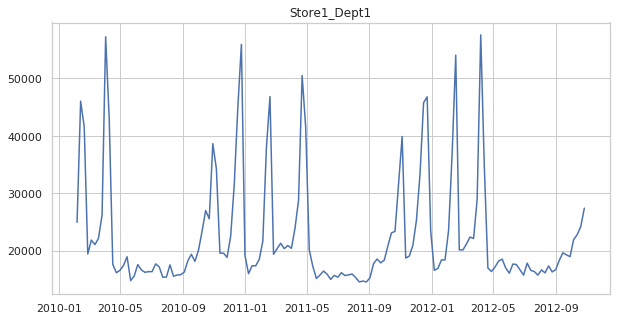

In [188]:
c = df['Store'] == 1
c2 = df['Dept'] == 1

plt.figure(figsize=(10,5))
plt.plot(df[c&c2].set_index('Date')['Weekly_Sales'])
plt.title('Store1_Dept1')
plt.show()

In [396]:
df_data1 = pd.DataFrame(columns=df['Store'].unique(), index=df['Dept'].unique())

for store in df['Store'].unique():
    c = df['Store'] == store
    for dept in df.loc[c, 'Dept'].unique():
        c2 = df['Dept'] == dept
        df_data1.loc[dept, store] = len(df[c&c2])

df_data1 = df_data1.fillna(0)

- assuming missing value is equal to 0 sales records

In [411]:
print('periods in train data:', np.unique(df_data1.values), sep='\n')

periods in train data:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  48  49  50  51  52  53  54
  56  57  58  59  60  61  62  64  65  66  67  68  69  70  71  74  75  76
  77  78  79  81  82  83  84  85  86  87  88  89  90  91  92  93  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143]


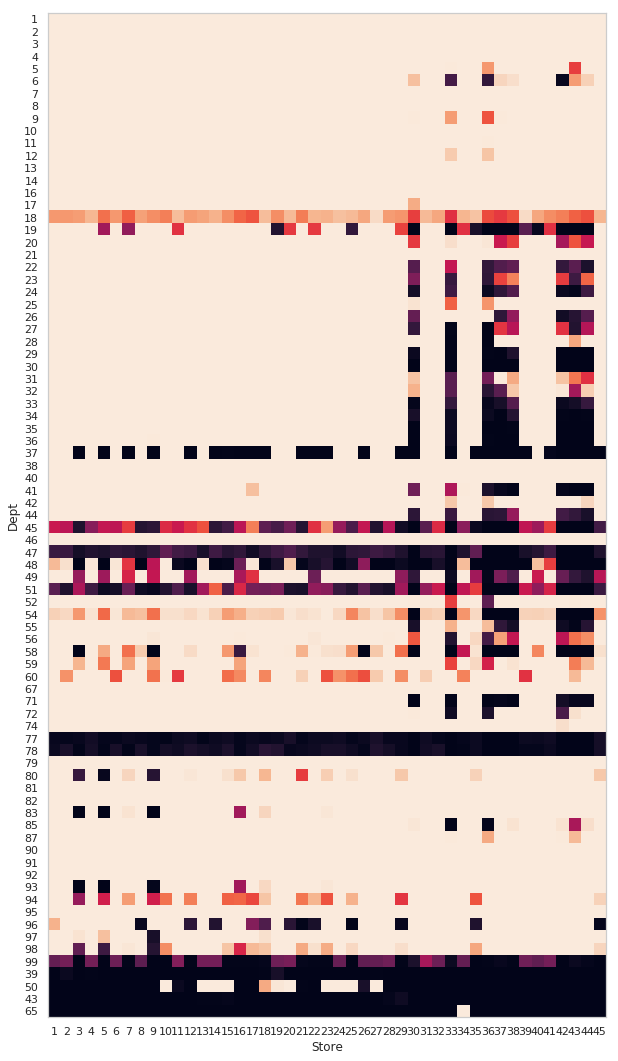

In [397]:
# show Store and Dept
#print('need to make :', len(np.where(df_data1==1)[0]), ' models')

fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(df_data1)

ax.set_xlabel('Store')
ax.set_ylabel('Dept')
ax.set_xticks(np.arange(df['Store'].nunique()))
ax.set_yticks(np.arange(df['Dept'].nunique()))
ax.set_xticklabels(df['Store'].unique())
ax.set_yticklabels(df['Dept'].unique())
plt.grid(False)
plt.show()

# 2. Key concept
- PCA
- Shift

## 2.1. PCA
- PCA pupose
    - Normal data: remove noise
    - Missing data: fill data
- Model: PCA + STL + ETS
- The step of creating model
    - PCA
    - STL
    - Forecast
    - Reseasonalize

---

Dept
- Common pattern within Dept
- Different pattern between Depts

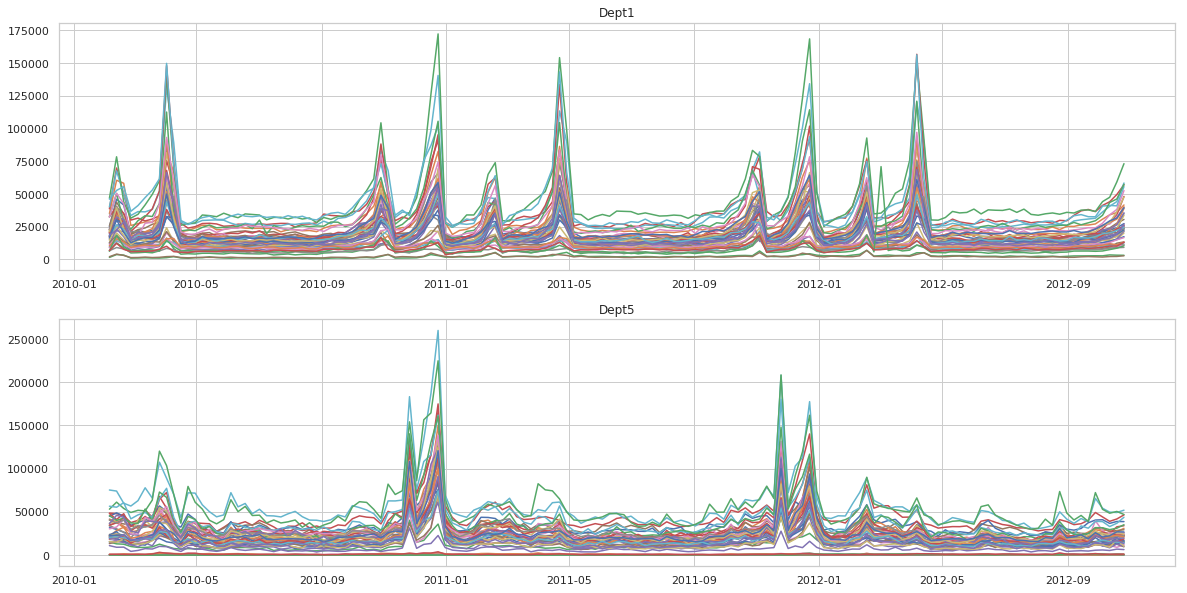

In [438]:
c = df['Dept'] == 1
df_pivot = df[c].pivot(index='Date', columns='Store', values='Weekly_Sales').fillna(0)
col = df_pivot.columns
idx = df_pivot.index

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(df_pivot)
plt.title('Dept1')

c = df['Dept'] == 5
df_pivot = df[c].pivot(index='Date', columns='Store', values='Weekly_Sales').fillna(0)
col = df_pivot.columns
idx = df_pivot.index

plt.subplot(212)
plt.plot(df_pivot)
plt.title('Dept5')
plt.show()

### 2.1.1 PCA
- store1_dept15

[0.94499751 0.95613096 0.96546707 0.97221145 0.9766195  0.9804393
 0.98315899 0.98556598 0.98743659 0.98900204 0.99023186 0.99137987]


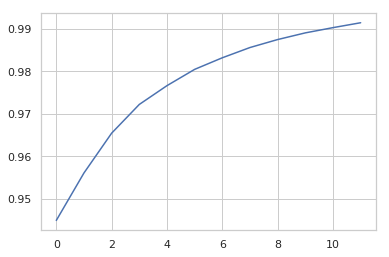

In [441]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
df_low = pca.fit_transform(df_pivot.fillna(0))
df_inverse = pca.inverse_transform(df_low)
df_inverse = pd.DataFrame(df_inverse, columns=col, index=idx)

print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

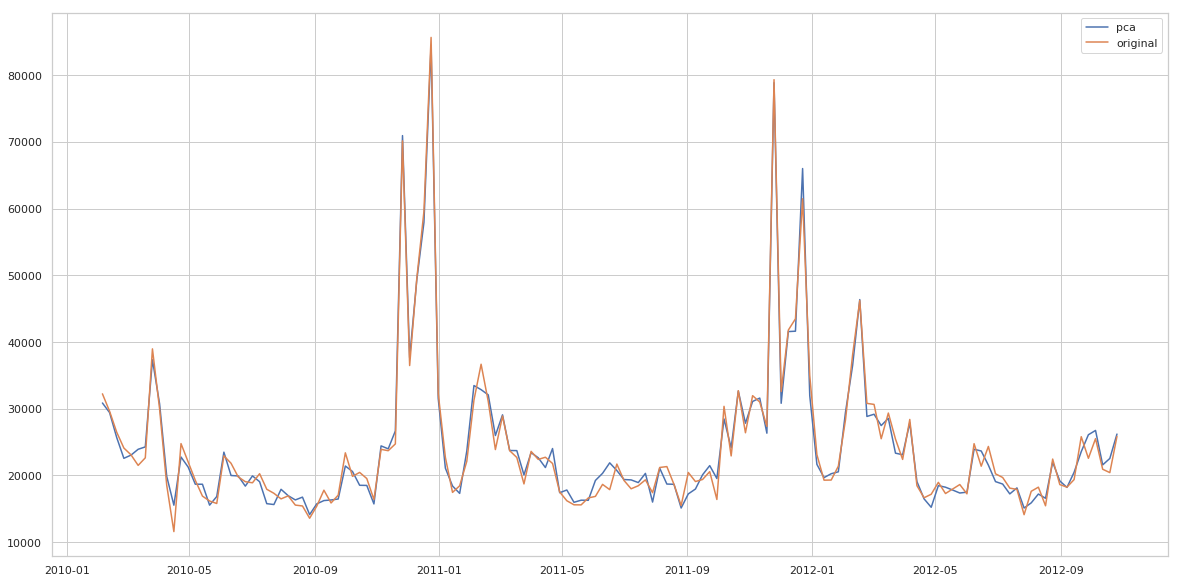

In [449]:
plt.figure(figsize=(20, 10))
plt.plot(df_inverse.loc[:, 1], label='pca')
plt.plot(df_pivot.loc[:, 1], label='original')
plt.legend()
plt.show()

### 2.1.2 Split train data

In [450]:
from statsmodels.tsa.seasonal import seasonal_decompose
# store 1
split_num = int(143*0.9)
split_idx = idx[split_num]

# original
ts_original, ts_test = df_pivot.loc[:split_idx, 1], df_pivot.loc[split_idx:, 1]
# PCA
ts_pca = df_inverse.loc[:split_idx, 1]

### 2.1.3 STL and Sesoanl adjust

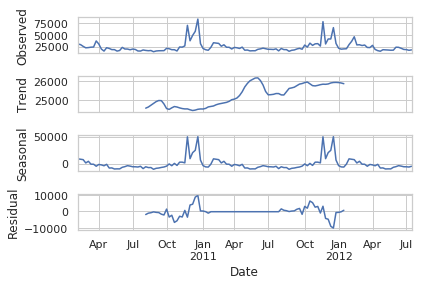

In [508]:
#decom_obj = seasonal_decompose(ts_original, freq=52)
decom_obj = seasonal_decompose(ts_pca, freq=52)
seasonality = decom_obj.seasonal

#seasonal_adj = ts_original - seasonality
seasonal_adj = ts_pca - seasonality
decom_obj.plot()
plt.show()

### 2.1.4 ETS model with seasonal adjusted ts

In [509]:
from statsmodels.tsa.api import ExponentialSmoothing
from dateutil.relativedelta import relativedelta

fcst_period = 15
res = ExponentialSmoothing(seasonal_adj, seasonal='add', seasonal_periods=52, freq='W-FRI').fit(optimized=True, remove_bias=True)
fcst = res.forecast(fcst_period)

In [510]:
# re-seasonalize
def reseasonlize(row):
    idx = row['index'] - relativedelta(weeks=52)
    if idx in seasonality.index:
        val = seasonality.loc[idx] + row[0]
    else:
        idx = row['index'] - relativedelta(weeks=52*2)
        val = seasonality.loc[idx] + row[0]
    return val

re_seasonal_fcst = fcst.reset_index().apply(reseasonlize, axis=1)
re_seasonal_fcst.index = fcst.index
#ori_fcst = re_seasonal_fcst
pca_fcst = re_seasonal_fcst

### 2.1.5 Result

pca: 3758.439957383294
original: 4837.54503921924


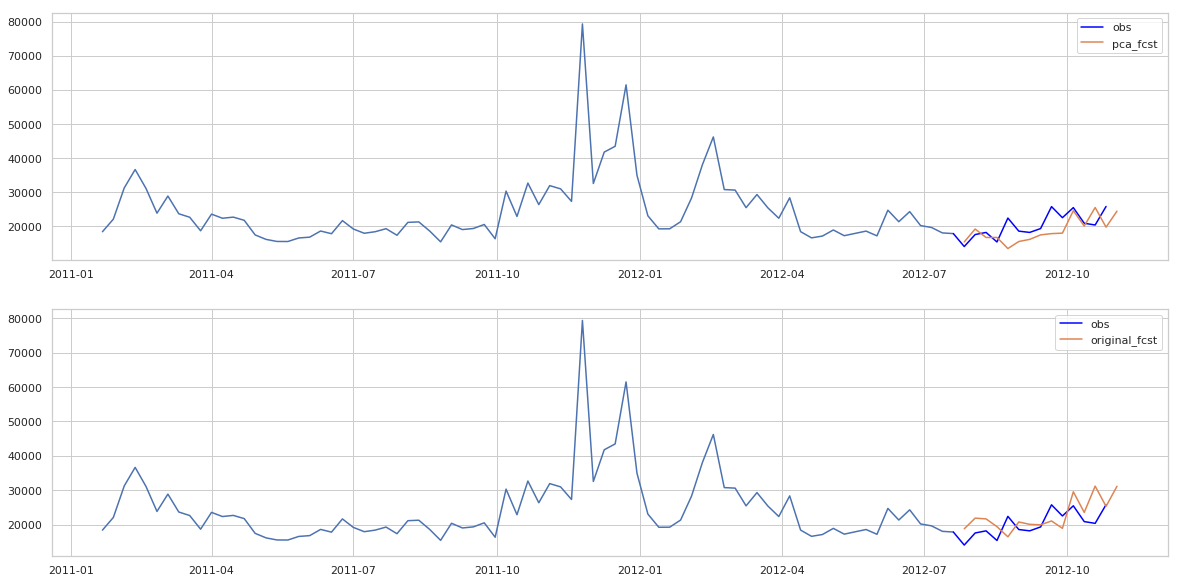

In [429]:
from sklearn.metrics import mean_squared_error

print('pca:', np.sqrt(mean_squared_error(ts_test, pca_fcst)))
print('original:', np.sqrt(mean_squared_error(ts_test, ori_fcst)))

plt.figure(figsize=(20, 10))

plt.subplot(211)
plt.plot(ts_original[50:], label='')
plt.plot(ts_test, color='blue', label='obs')
plt.plot(pca_fcst, label='pca_fcst')
plt.legend()

plt.subplot(212)
plt.plot(ts_original[50:], label='')
plt.plot(ts_test, color='blue', label='obs')
plt.plot(ori_fcst, label='original_fcst')
plt.legend()

plt.show()

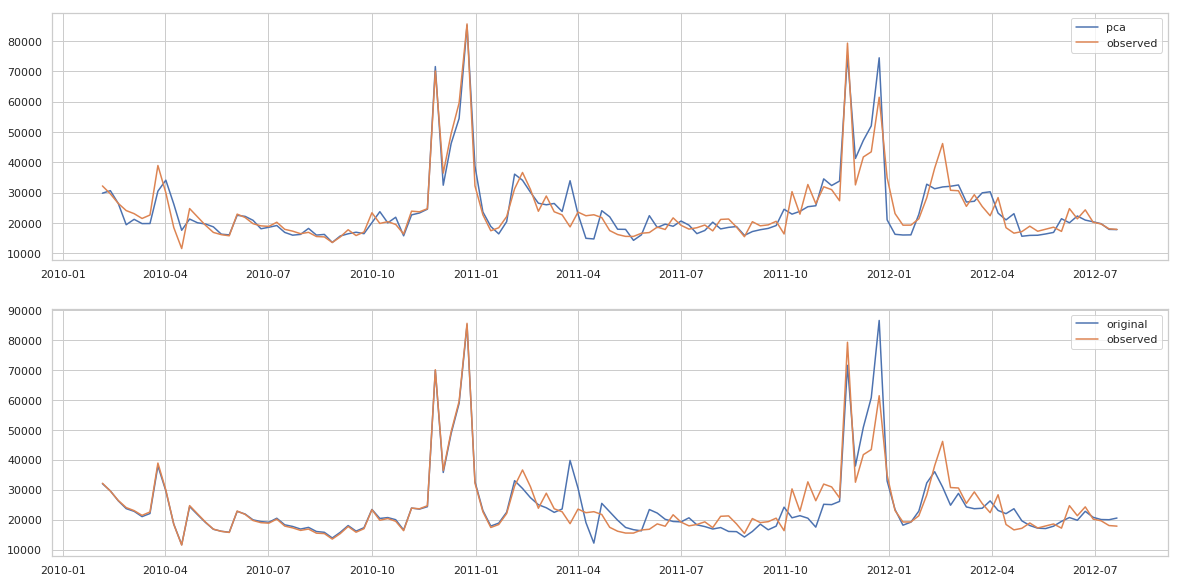

In [504]:
def reseasonlize2(row):
    idx = row['index']
    val = seasonality.loc[idx] + row[0]
    return val
re_pred = res.fittedvalues.reset_index().rename(columns={'Date':'index'}).apply(reseasonlize2, axis=1)
re_pred.index = res.fittedvalues.index
#pca_pred = re_pred
ori_pred = re_pred

plt.figure(figsize=(20, 10))

plt.subplot(211)
plt.plot(pca_pred, label='pca')
plt.plot(ts_original, label='observed')
plt.legend()

plt.subplot(212)
plt.plot(ori_pred, label='original')
plt.plot(ts_original, label='observed')
plt.legend()

plt.show()

In [511]:
#ori_resid = res.resid.sum()
pca_resid = res.resid.sum()

In [513]:
print('pca_resid', pca_resid)
print('ori_resid', ori_resid) 

pca_resid 10215.311078733976
ori_resid 72893.79817183453


### comparison

In [430]:
# 매출이 발생하지 않았음
## 예측하기에 데이터가 부족함
c = df['Dept'] == 47
df_pivot = df[c].pivot(index='Date', columns='Store', values='Weekly_Sales')
s = df_pivot.index[0]; e = df_pivot.index[-1]
i = pd.DatetimeIndex(start=s, end=e, freq='W-FRI')

df_pivot = df_pivot.merge(pd.DataFrame(i).rename(columns={0:'Date'}), how='outer', on='Date').set_index('Date').sort_index()
col = df_pivot.columns; idx = df_pivot.index
df_pivot

,1,2,3,4,5,6,7,8,9,10,...,28,29,31,32,34,35,39,40,41,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,70.0,NaN,10.0,NaN,NaN,-59.0,25.0,NaN,NaN,NaN,...,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,NaN,NaN,83.0,498.00,30.0,100.0,NaN,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,80.00,70.0,NaN
2010-02-19,-863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.74,0.0,...,100.00,298.00,NaN,NaN,19.97,NaN,NaN,NaN,NaN,NaN
2010-02-26,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,598.0,...,NaN,27.00,NaN,NaN,NaN,NaN,NaN,NaN,40.0,-1750.00
2010-03-05,NaN,NaN,NaN,NaN,NaN,NaN,50.0,174.0,NaN,-798.0,...,41.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.0,NaN
2010-03-12,-698.0,NaN,NaN,35.00,28.0,60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-19,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,-48.00,NaN,...,-198.00,NaN,NaN,NaN,NaN,-78.00,NaN,NaN,NaN,NaN
2010-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
2010-04-02,NaN,NaN,NaN,19.97,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,-124.00,NaN,-224.00,NaN,NaN


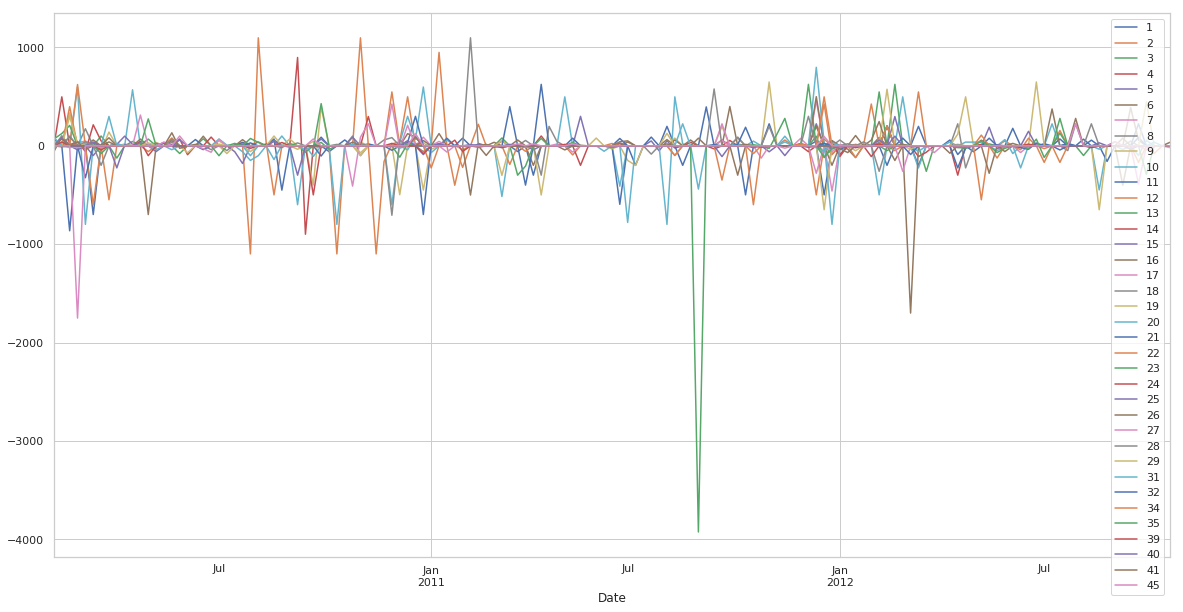

In [310]:
df_pivot = df_pivot.fillna(0)
f, ax = plt.subplots(figsize=(20, 10))
df_pivot.plot(ax=ax)
plt.show()

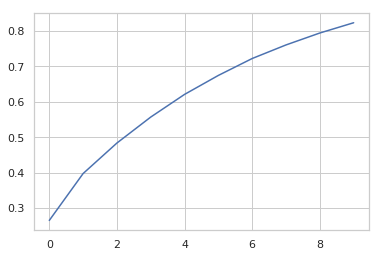

In [431]:
df_pivot = df_pivot.fillna(0)
# pca
pca = PCA(n_components=10)
df_low = pca.fit_transform(df_pivot.fillna(0))
df_inverse = pca.inverse_transform(df_low)
df_inverse = pd.DataFrame(df_inverse, columns=col, index=idx)

split_num = int(143*0.9)
split_idx = idx[split_num]

# original
ts_original, ts_test = df_pivot.loc[:split_idx, 1], df_pivot.loc[split_idx:, 1]
# PCA
ts_pca = df_inverse.loc[:split_idx, 1]

plt.plot(np.cumsum(pca.explained_variance_ratio_))
np.cumsum(pca.explained_variance_ratio_)
plt.show()

In [434]:
decom_obj = seasonal_decompose(ts_original, freq=52)
#decom_obj = seasonal_decompose(ts_pca, freq=52)
seasonality = decom_obj.seasonal

seasonal_adj = ts_original - seasonality
#seasonal_adj = ts_pca - seasonality

fcst_period = 15
res = ExponentialSmoothing(seasonal_adj, seasonal='add', seasonal_periods=52, freq='W-FRI').fit(optimized=True, remove_bias=True)
fcst = res.forecast(fcst_period)

# re-seasonalize
re_seasonal_fcst = fcst.reset_index().apply(reseasonlize, axis=1)
re_seasonal_fcst.index = fcst.index

ori_fcst = re_seasonal_fcst
#pca_fcst = re_seasonal_fcst

pca: 88.37926580752544
original: 95.50043907648204


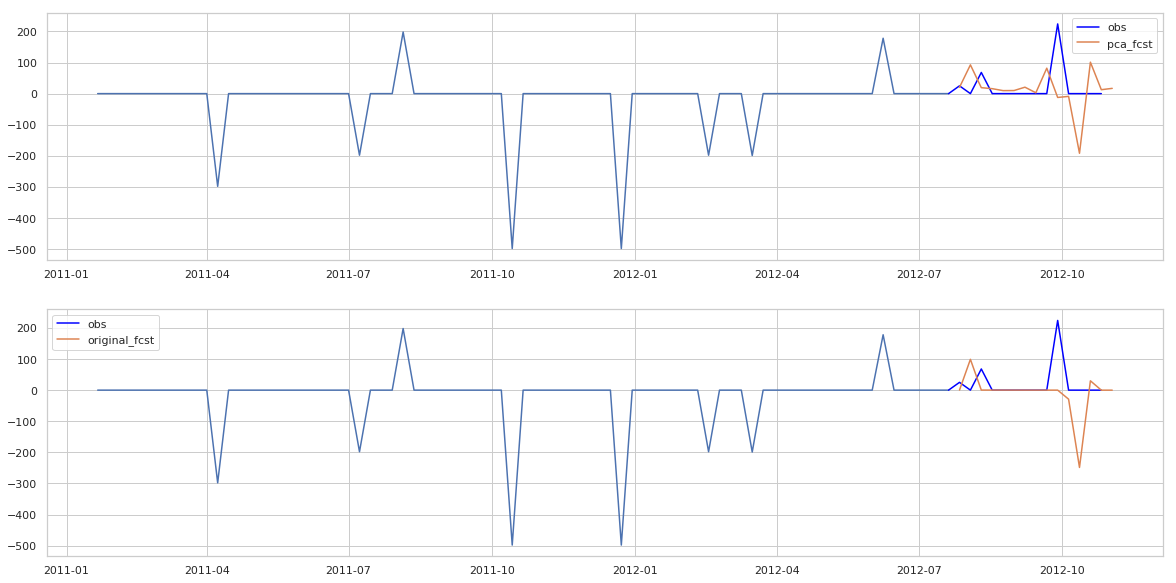

In [435]:
print('pca:', np.sqrt(mean_squared_error(ts_test, pca_fcst)))
print('original:', np.sqrt(mean_squared_error(ts_test, ori_fcst)))

plt.figure(figsize=(20, 10))

plt.subplot(211)
plt.plot(ts_original[50:], label='')
plt.plot(ts_test, color='blue', label='obs')
plt.plot(pca_fcst, label='pca_fcst')
plt.legend()

plt.subplot(212)
plt.plot(ts_original[50:], label='')
plt.plot(ts_test, color='blue', label='obs')
plt.plot(ori_fcst, label='original_fcst')
plt.legend()

plt.show()

# 2.2 Shift: X-mas effect

### 2010-12-25 (Sat, 52nd Week)
- 52nd Week didn't take advantage of the x-mas season

### 2011-12-25 (Sun, 52nd Week)
- 52nd Week had only **1 day(Sat)** to take advantage of the x-mas season

### 2012-12-25 (Tue, 52nd Week)
- (test data)52nd Week had **3 day(Sat, Sun, Mon)** to take advantage of the x-mas season

In [701]:
c = df['Dept'] == 1
df_pivot = df[c].pivot(index='Date', columns='Store', values='Weekly_Sales').fillna(0)
col = df_pivot.columns
idx = df_pivot.index

ca = PCA(n_components=12)
df_low = pca.fit_transform(df_pivot.fillna(0))
df_inverse = pca.inverse_transform(df_low)
df_inverse = pd.DataFrame(df_inverse, columns=col, index=idx)

ts_pca = df_pivot.loc[:, 1]

decom_obj = seasonal_decompose(ts_pca, freq=52)
seasonality = decom_obj.seasonal

seasonal_adj = ts_pca - seasonality

fcst_period=39
res = ExponentialSmoothing(seasonal_adj, seasonal='add', seasonal_periods=52, freq='W-FRI').fit(optimized=True, remove_bias=True)
fcst = res.forecast(fcst_period)

# re-seasonalize
def reseasonlize(row):
    idx = row['index'] - relativedelta(weeks=52)
    if idx in seasonality.index:
        val = seasonality.loc[idx] + row[0]
    else:
        idx = row['index'] - relativedelta(weeks=52*2)
        val = seasonality.loc[idx] + row[0]
    return val

re_seasonal_fcst = fcst.reset_index().apply(reseasonlize, axis=1)
re_seasonal_fcst.index = fcst.index
pca_fcst = re_seasonal_fcst

def reseasonlize2(row):
    idx = row['index']
    val = seasonality.loc[idx] + row[0]
    return val
re_pred = res.fittedvalues.reset_index().rename(columns={'Date':'index'}).apply(reseasonlize2, axis=1)
re_pred.index = res.fittedvalues.index

In [ ]:
# find wk51, 52 in pca_fcst
idx = np.where(pca_fcst.index.week.isin([51,52]))[0]
idx1, idx2 = pca_fcst.index[idx]

# find wk51, 52 in observed data
sample = df_pivot.loc[:, 1]
idx = np.where(sample.index.week.isin([51, 52]))[0]
idx3, idx4, idx5, idx6 = sample.index[idx]

In [710]:
# shift data
recticified_fcst = pca_fcst.copy()
wk51 = pca_fcst[idx1]
wk52 = pca_fcst[idx2]
recticified_fcst[idx1], recticified_fcst[idx2] = wk51*(4.5/7) + wk52*(2.5/7), wk52*(4.5/7) + wk51*(2.5/7)

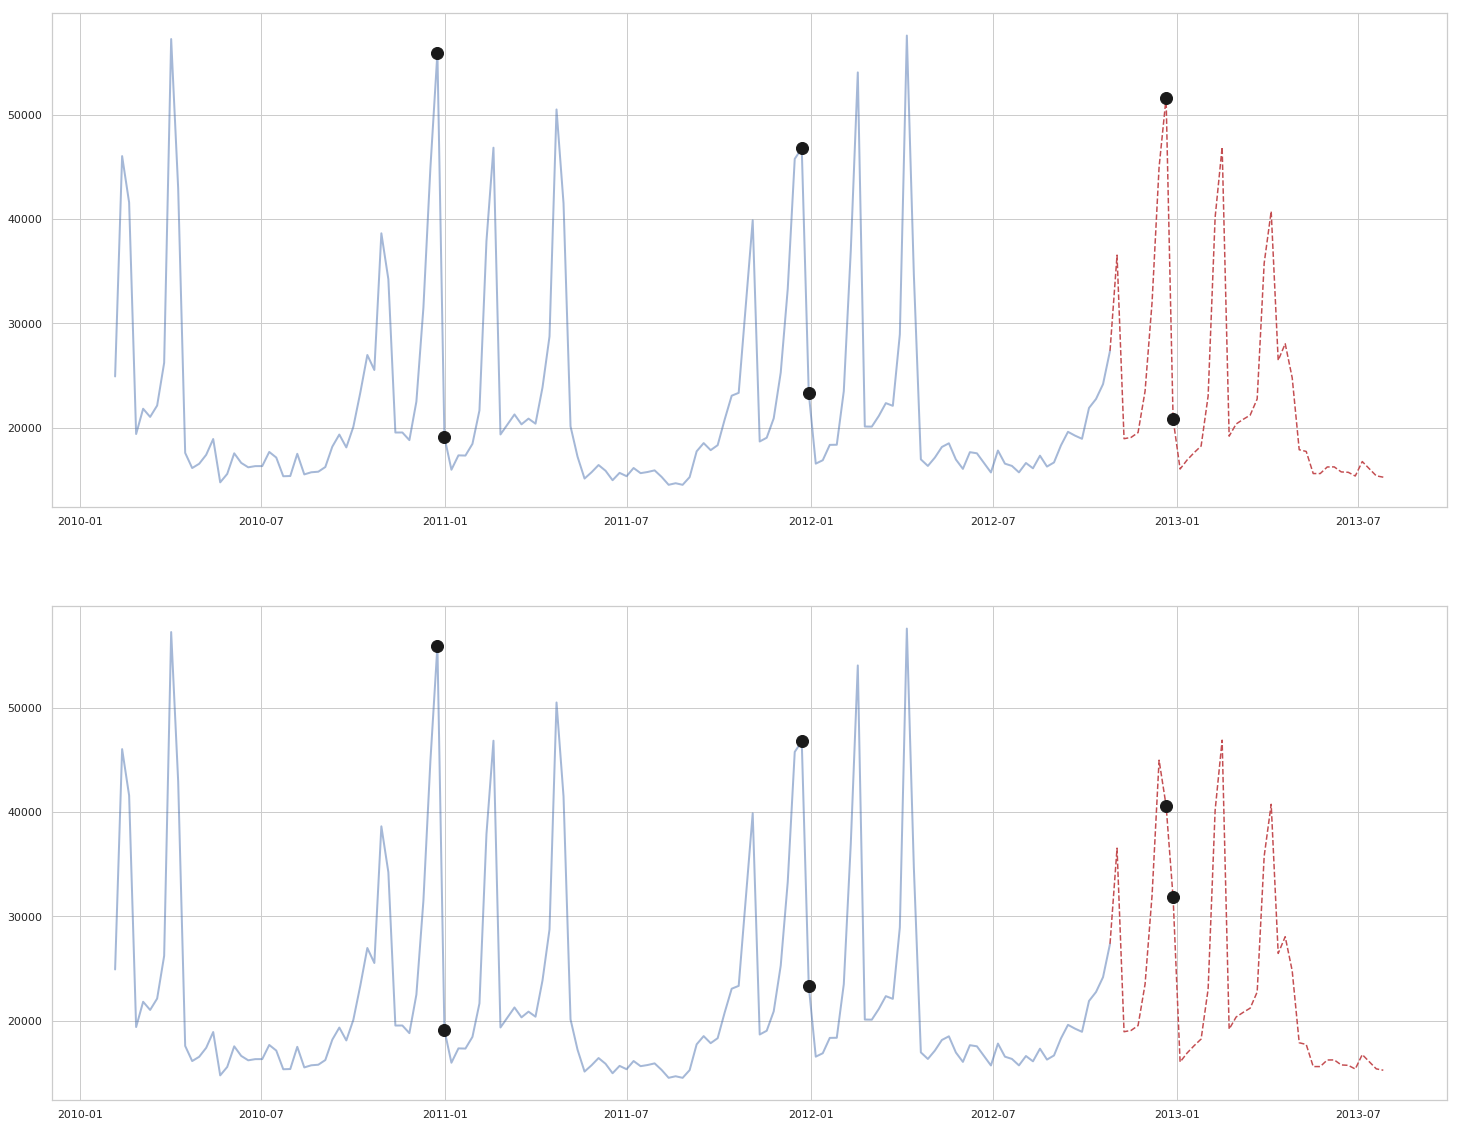

In [711]:
plt.figure(figsize=(25, 20))

plt.subplot(211)

# original
plt.plot(sample, color='b', alpha=.5, linewidth=2)
plt.plot(idx3, sample[idx3], 'o', markersize=12, c='k')
plt.plot(idx4, sample[idx4], 'o', markersize=12, c='k')
plt.plot(idx5, sample[idx5], 'o', markersize=12, c='k')
plt.plot(idx6, sample[idx6], 'o', markersize=12, c='k')

# fcst
plt.plot(sample[-1:].append(pca_fcst), linestyle='--', color='r')
plt.plot(idx1, pca_fcst[idx1], 'o', markersize=12, color='k')
plt.plot(idx2, pca_fcst[idx2], 'o', markersize=12, color='k')

plt.subplot(212)

# orginal
plt.plot(sample, color='b', alpha=.5, linewidth=2)
plt.plot(idx3, sample[idx3], 'o', markersize=12, c='k')
plt.plot(idx4, sample[idx4], 'o', markersize=12, c='k')
plt.plot(idx5, sample[idx5], 'o', markersize=12, c='k')
plt.plot(idx6, sample[idx6], 'o', markersize=12, c='k')

# recticified fcst
plt.plot(sample[-1:].append(recticified_fcst), linestyle='--', color='r')
plt.plot(idx1, recticified_fcst[idx1], 'o', markersize=12, color='k')
plt.plot(idx2, recticified_fcst[idx2], 'o', markersize=12, color='k')
plt.show()

# 3. Limitation

- python3 module auto_arima much slower than R's module. It took a couple days to make model by auto_arima and so It was hard to compare performances with other models.
- adjust other holiday sales records